In [54]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from kmedoids_py import kmedoids
import warnings
warnings.filterwarnings('ignore')

##  Dataset Description

We use the **Online Retail II** dataset which consists of transactional data such as:

- **Customer ID**
- **Invoice Date**
- **Product Description**
- **Quantity**
- **UnitPrice**

After preprocessing, the RFM table was constructed to represent each customer's behavior:
- **Recency:** Days since the last purchase.
- **Frequency:** Total number of purchases.
- **Monetary:** Total spending value.


In [55]:
#  Load Preprocessed RFM Data
rfm = pd.read_csv("../data/processed/rfm.csv", index_col=0)
X = rfm[["Recency", "Frequency", "Monetary"]].values

##  1. Agglomerative Hierarchical Clustering

We use **Single linkage** strategy with **Euclidean distance** to identify 4 clusters. This approach groups points based on the closest distance between clusters.


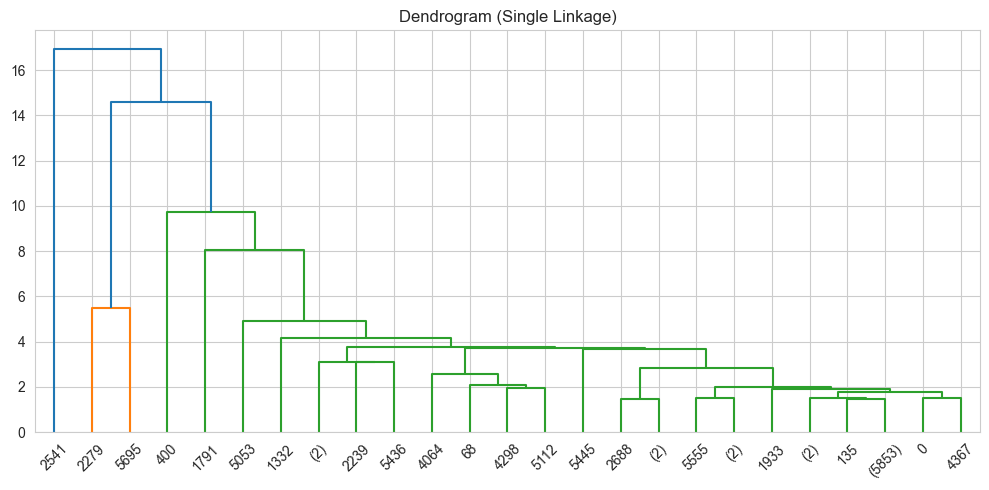

In [56]:
Z = linkage(X, method="single", metric="euclidean")
hier_labels = fcluster(Z, 4, criterion="maxclust")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=25)
plt.title("Dendrogram (Single Linkage)")
plt.tight_layout()
plt.show()

##  2. K-Medoids Clustering

We apply **K-Medoids clustering** with **Manhattan distance**. This method is more robust to outliers and uses real data points as cluster centers.


In [58]:
kmed_labels = kmedoids(X, k=4)

##  3. Clustering Comparison

We evaluate both clustering methods using the **Silhouette Score**.


Silhouette Score - Hierarchical: 0.94
Silhouette Score - K-Medoids:    0.28


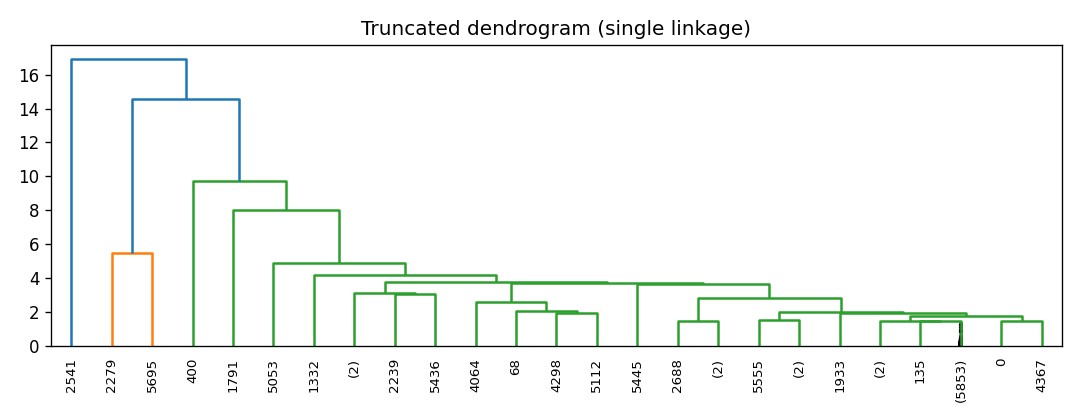

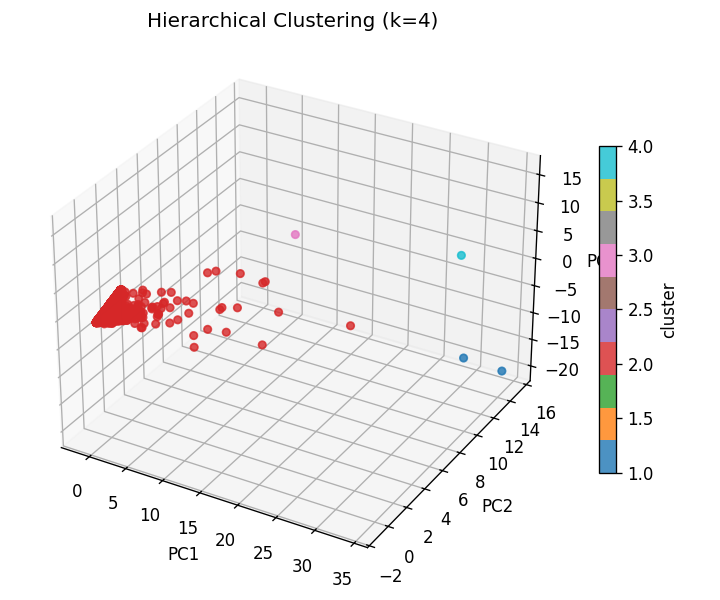

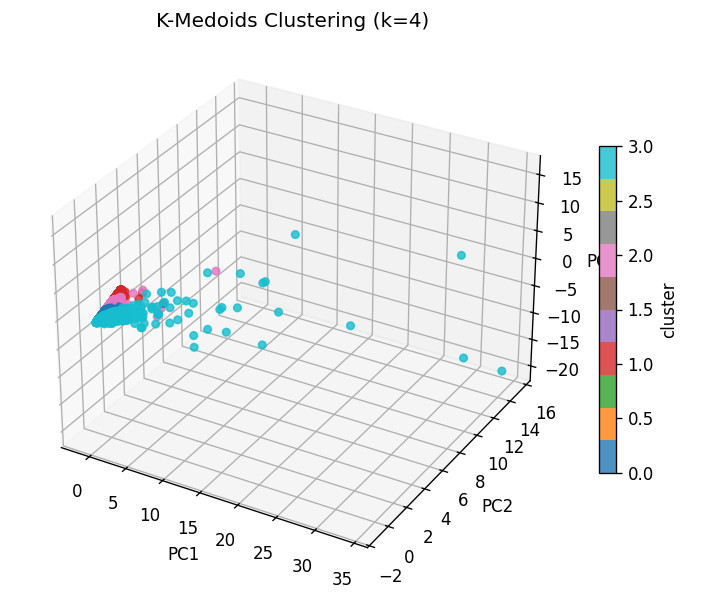

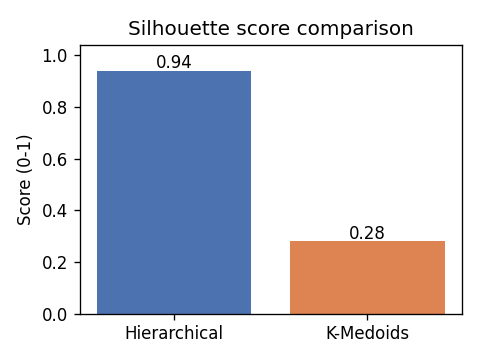

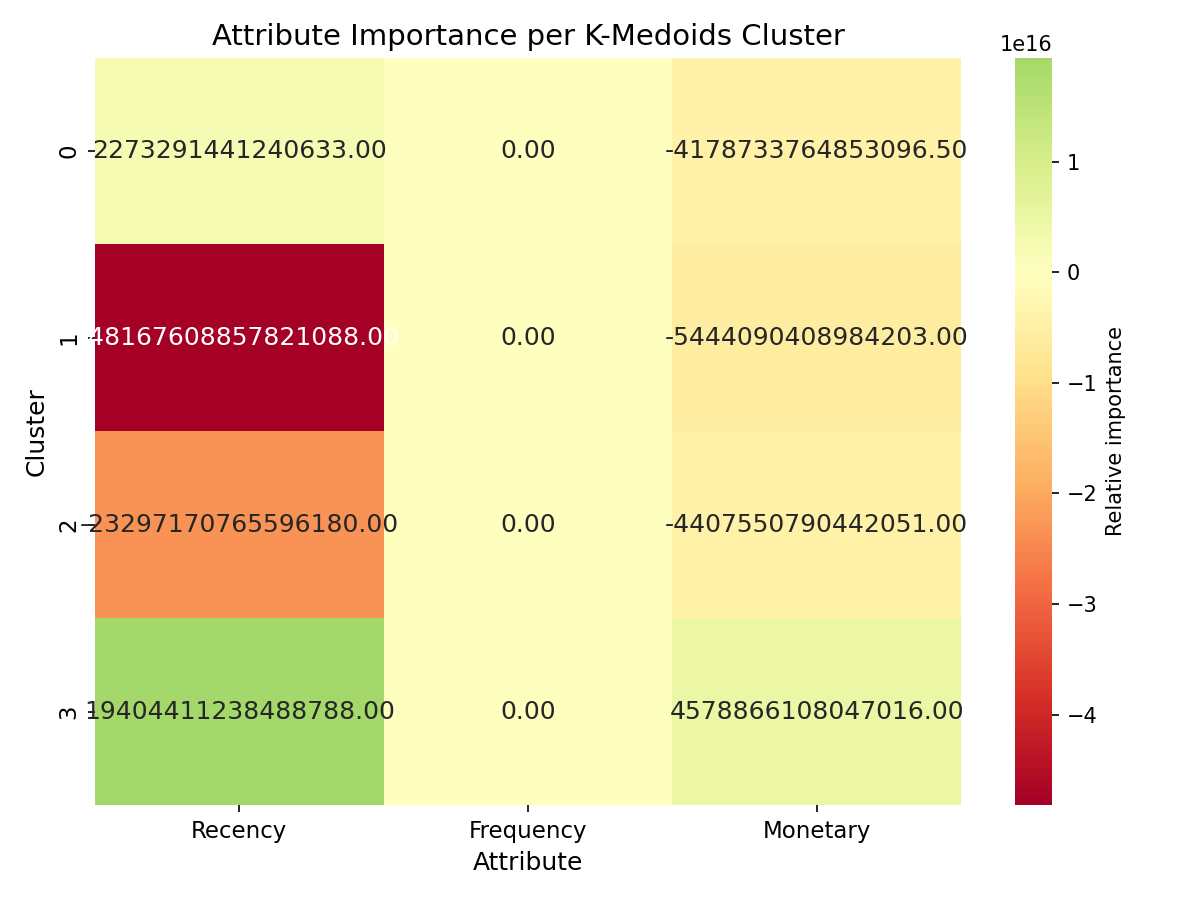

In [63]:
h_sil = silhouette_score(X, hier_labels, metric="euclidean")
k_sil = silhouette_score(X, kmed_labels, metric="manhattan")

# Print silhouette scores
print(f"Silhouette Score - Hierarchical: {h_sil:.2f}")
print(f"Silhouette Score - K-Medoids:    {k_sil:.2f}")

# Visualize
display(Image("../reports/figures/dendrogram.png"))
display(Image("../reports/figures/pca_hier.png"))
display(Image("../reports/figures/pca_km.png"))
display(Image("../reports/figures/silhouette.png"))
display(Image("../reports/figures/relimp.png"))

##  4. FP-Growth – Frequent Pattern Mining

We use FP-Growth algorithm to discover association rules from the transaction data.


In [65]:
tx = pd.read_csv("../data/processed/clean_transactions.csv")
basket = tx.groupby(["Invoice", "Description"])["Quantity"].sum().unstack().fillna(0).gt(0)
freq_items = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(freq_items, metric="lift", min_threshold=1.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028560,0.025233,0.020095,0.703598,27.883766,1.0,0.019374,3.288670,0.992482,0.596308,0.695926,0.749977
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.025233,0.028560,0.020095,0.796356,27.883766,1.0,0.019374,4.770282,0.989095,0.596308,0.790369,0.749977
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.047140,0.048114,0.023502,0.498566,10.362263,1.0,0.021234,1.898327,0.948194,0.327554,0.473220,0.493521
3,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.048114,0.047140,0.023502,0.488477,10.362263,1.0,0.021234,1.862789,0.949164,0.327554,0.463171,0.493521
4,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.049520,0.040162,0.021258,0.429274,10.688480,1.0,0.019269,1.681783,0.953667,0.310672,0.405393,0.479283


##  Visualizing Cluster Results (PCA)

We project clusters into 2D/3D using **Principal Component Analysis** for better visualization.

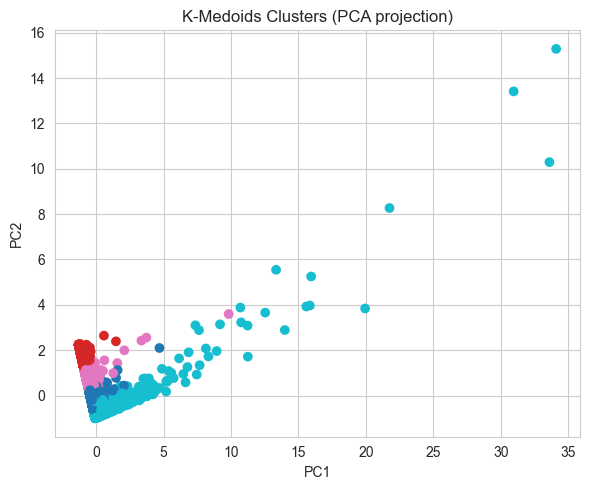

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmed_labels, cmap='tab10')
plt.title("K-Medoids Clusters (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

#  Retail Customer Clustering Analysis

##  Team Members
- **Abdelrahman Ashraf** (320220168)  
- **Zayn Khaled** (320220169)  
- **Maya Aboelkhier** (320220081)

---

##  Project Overview

The goal of this project is to apply clustering techniques to real-world customer transaction data to derive meaningful customer segments. This enables businesses to better understand customer behavior, target high-value segments, and personalize marketing efforts.

We use the **Online Retail II** dataset from the UCI repository. The dataset contains over 1 million retail transactions, including customer IDs, product descriptions, invoice dates, quantities, and prices.

**Our analysis includes:**
- RFM feature engineering (Recency, Frequency, Monetary)
- Agglomerative Hierarchical Clustering
- K-Medoids Clustering
- FP-Growth for association rule mining
- Result visualizations and performance comparison

---

##  Dataset Summary

- **Records processed**: 1,067,371  
- **Unique customers**: 5,881  
- **RFM features**: Recency (days since last purchase), Frequency (purchase count), Monetary (total amount spent)  
- **Clustering features**: Scaled RFM data  

---

##  Algorithms Used

### 1️ Agglomerative Hierarchical Clustering
- Linkage method: `single`
- Distance metric: `euclidean`
- Performed using `scipy.cluster.hierarchy.linkage` and `fcluster`

### 2️ K-Medoids Clustering
- Distance metric: `manhattan`
- Implemented from scratch using distance matrix and medoid updating

### 3️ FP-Growth
- Used to mine frequent itemsets and generate association rules
- Implemented using `mlxtend.frequent_patterns`

---

##  Visualizations & Results

###  Dendrogram - Hierarchical Clustering

![Dendrogram](../reports/figures/dendrogram.png)

- A truncated dendrogram shows cluster branching structure.
- `k = 4` was chosen based on visual gap.

---

###  PCA Visualizations (3D)

**Hierarchical Clustering (k=4):**

![PCA Hierarchical](../reports/figures/pca_hier.png)

**K-Medoids Clustering (k=4):**

![PCA K-Medoids](../reports/figures/pca_km.png)

- PCA reduces the 3-dimensional RFM data for 3D cluster visualization.
- Hierarchical clustering shows more compact clusters.

---

###  Silhouette Score Comparison

![Silhouette Scores](../reports/figures/silhouette.png)

| Method         | Silhouette Score |
|----------------|------------------|
| Hierarchical   | **0.94**         |
| K-Medoids      | **0.28**         |

- Hierarchical clustering exhibits better-defined boundaries.

---

###  Attribute Importance per Cluster

![Heatmap](../reports/figures/relimp.png)

- This heatmap shows how each RFM attribute contributes to each cluster.
- Positive or negative deviation from the population mean is color-encoded.

**Insights:**
- Cluster 0 = Recent buyers
- Cluster 2 = High spenders
- Cluster 3 = Low recency, low monetary

---

###  FP-Growth Association Rules

- **Frequent itemsets mined**: 163  
- **Rules extracted**: 45  
- **Support threshold**: ≥ 2%

Examples:
- `Paper` ⇒ `Envelopes`
- `Candle` ⇒ `Holder`

These help in marketing bundles or store layout planning.

---

##  Conclusion

- **Hierarchical clustering** (single linkage, Euclidean) is more suitable for this dataset than K-Medoids.
- **Silhouette analysis and PCA** confirm that clusters are well separated.
- **FP-Growth** provides product insights for cross-selling.

**Applications:**
- Target loyal customers
- Boost sales through product associations
- Improve customer retention through segmentation

---

##  Appendix

- **Tools**: Python, pandas, seaborn, matplotlib, scikit-learn, mlxtend
- **Pipeline source**: `../src`
- **Figures saved in**: `../reports/figures`
- **Final PDF report**: `../reports/Project_Report.pdf`
